In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11996910963595104795
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2907098318
locality {
  bus_id: 1
  links {
  }
}
incarnation: 995982419158364434
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


## Importing Libraries

In [2]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "E:\Malaria Dataset\Dataset\Train"
valid_path = "E:\Malaria Dataset\Dataset\Test"

## Importing VGG-19 Library and model

In [4]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob("E:\Malaria Dataset\Dataset\Train\*")

In [7]:
folders

['E:\\Malaria Dataset\\Dataset\\Train\\Parasite',
 'E:\\Malaria Dataset\\Dataset\\Train\\Uninfected']

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## Data Preprocessing of training set and testing set

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
his = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

E:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
7/7 [==============================] - 39s 3s/step - loss: 2.0041 - accuracy: 0.5192 - val_loss: 1.1845 - val_accuracy: 0.3507
Epoch 2/25
7/7 [==============================] - 6s 801ms/step - loss: 1.2752 - accuracy: 0.5144 - val_loss: 0.8642 - val_accuracy: 0.6791
Epoch 3/25
7/7 [==============================] - 6s 800ms/step - loss: 0.7579 - accuracy: 0.6322 - val_loss: 0.6409 - val_accuracy: 0.6716
Epoch 4/25
7/7 [==============================] - 6s 752ms/step - loss: 0.6177 - accuracy: 0.6707 - val_loss: 1.0596 - val_accuracy: 0.5075
Epoch 5/25
7/7 [==============================] - 6s 847ms/step - loss: 0.5558 - accuracy: 0.7043 - val_loss: 0.6419 - val_accuracy: 0.6866
Epoch 6/25
7/7 [==============================] - 6s 810ms/step - loss: 0.4309 - accuracy: 0.8077 - val_loss: 0.5171 - val_accuracy: 0.6791
Epoch 7/25
7/7 [==============================] - 6s 855ms/step - loss: 0.3804 - accuracy: 0.8269 - val_loss: 0.4987 - val_accuracy: 0.7687
Epoch 8/25
7/7 [======

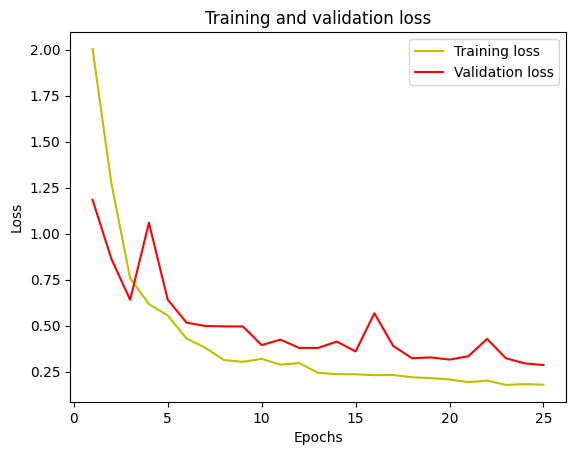

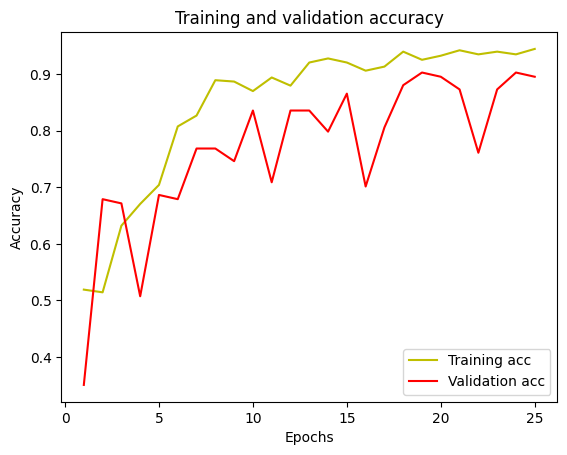

In [16]:
#plot the training and validation accuracy and loss at each epoch
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Image prediction

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_VGG16_CNN_Malaria.h5')

In [18]:
y_pred = model.predict(test_set)

import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('model_VGG16_CNN_Malaria.h5')

In [20]:
img_path = r"E:\Malaria Dataset\cell_images\Test\Parasitized\C39P4thinF_original_IMG_20150622_110115_cell_136.png"
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [21]:
x.shape

(224, 224, 3)

In [22]:
x=x/255
x=np.expand_dims(x,axis=0)
img = np.reshape(x,[1,224,224,3])
img.shape

(1, 224, 224, 3)

In [23]:
model.predict(img)

array([[9.9909770e-01, 9.0231554e-04]], dtype=float32)

In [24]:
a=np.argmax(model.predict(img), axis=1)
if(a==1):
    print("Uninfected")
else:
    print("Infected")


Infected


## Confusion Matrix

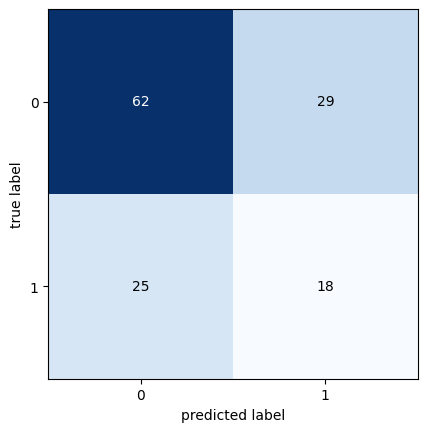

In [25]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


#rounded_predictions = model.predict(test_set, batch_size=128, verbose=0)

import numpy as np
#rounded_labels=np.argmax(test_set.classes, axis=1)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(conf_mat=cm)

plt.show()